### Step 1: Importing Data

In [833]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn import metrics

In [834]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [835]:
Lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [836]:
Lead_df = pd.read_csv('Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [837]:
Lead_df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

### Step2 : EDA

In [838]:
null_percent = Lead_df.isnull().sum() * 100 / len(Lead_df)
print(null_percent)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [839]:
null_percent[null_percent > 50]

Lead Quality    51.590909
dtype: float64

In [840]:
Lead_df = Lead_df.drop(null_percent[null_percent > 44].index, axis=1)

In [841]:
null_percent = Lead_df.isnull().sum() * 100 / len(Lead_df)
print(null_percent)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

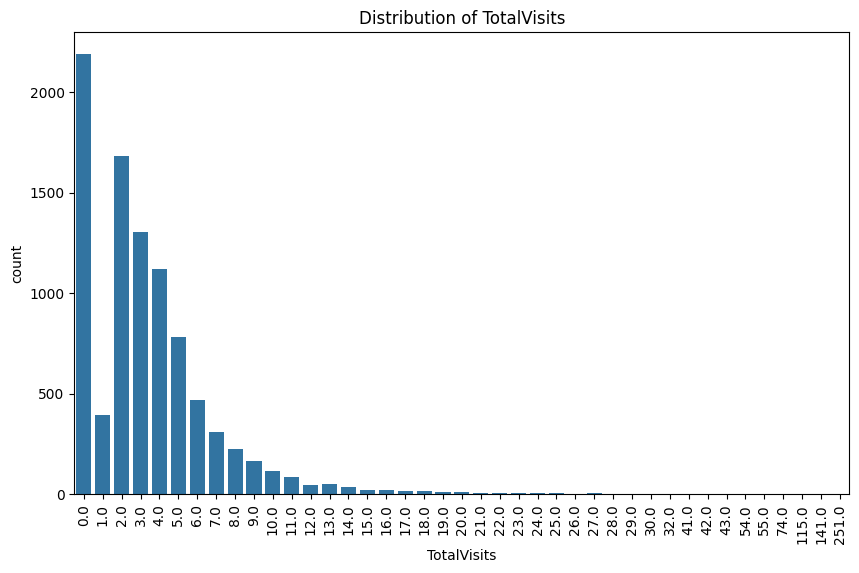

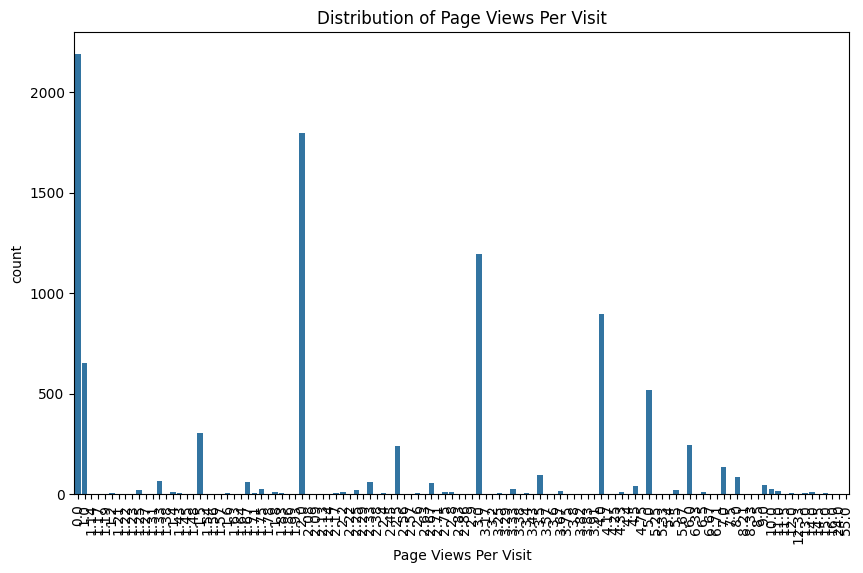

In [842]:
for col in Lead_df.select_dtypes('float64').columns:
    if Lead_df[col].isnull().sum() > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=Lead_df[col].value_counts().index, y=Lead_df[col].value_counts())
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()

In [843]:
for col in Lead_df.select_dtypes('int64').columns:
    if Lead_df[col].isnull().sum() > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=Lead_df[col].value_counts().index, y=Lead_df[col].value_counts())
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()

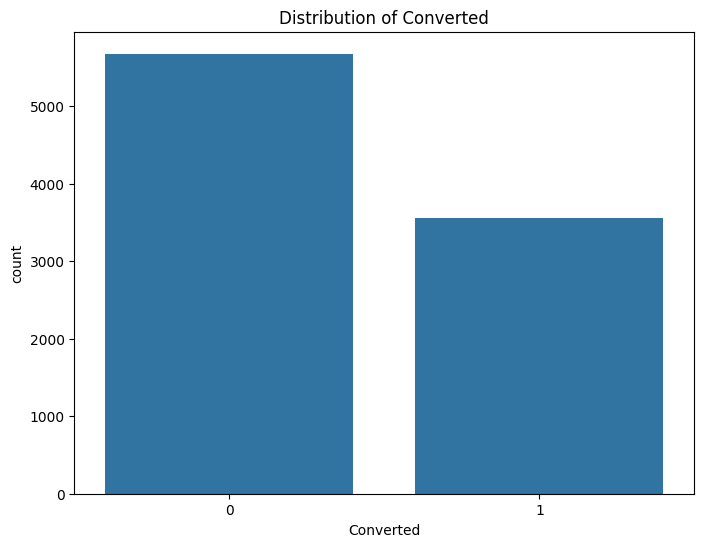

In [844]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', data=Lead_df)
plt.title('Distribution of Converted')
plt.show()

In [845]:
Lead_df.drop(['Lead Profile','How did you hear about X Education','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 
'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Country',
              'Tags',
'Get updates on DM Content', 'I agree to pay the amount through cheque','City','What matters most to you in choosing a course'],axis= 1, inplace = True)

In [846]:
for col in Lead_df.select_dtypes(include=['object']):
    if Lead_df[col].isnull().sum() > 0:  # Check if there are null values
        mode_value = Lead_df[col].mode()[0]  # Get the mode value
        Lead_df[col].fillna(mode_value, inplace=True)  # Replace nulls with mode

# Replace null values in numeric columns with mean
for col in Lead_df.select_dtypes(include=[np.number]):
    if Lead_df[col].isnull().sum() > 0:  # Check if there are null values
        mean_value = Lead_df[col].mean()  # Get the mean value
        Lead_df[col].fillna(mean_value, inplace=True)  # Replace nulls with mean

# Check for any remaining null values
print(Lead_df.isnull().sum())

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


#### Outliers Analysis

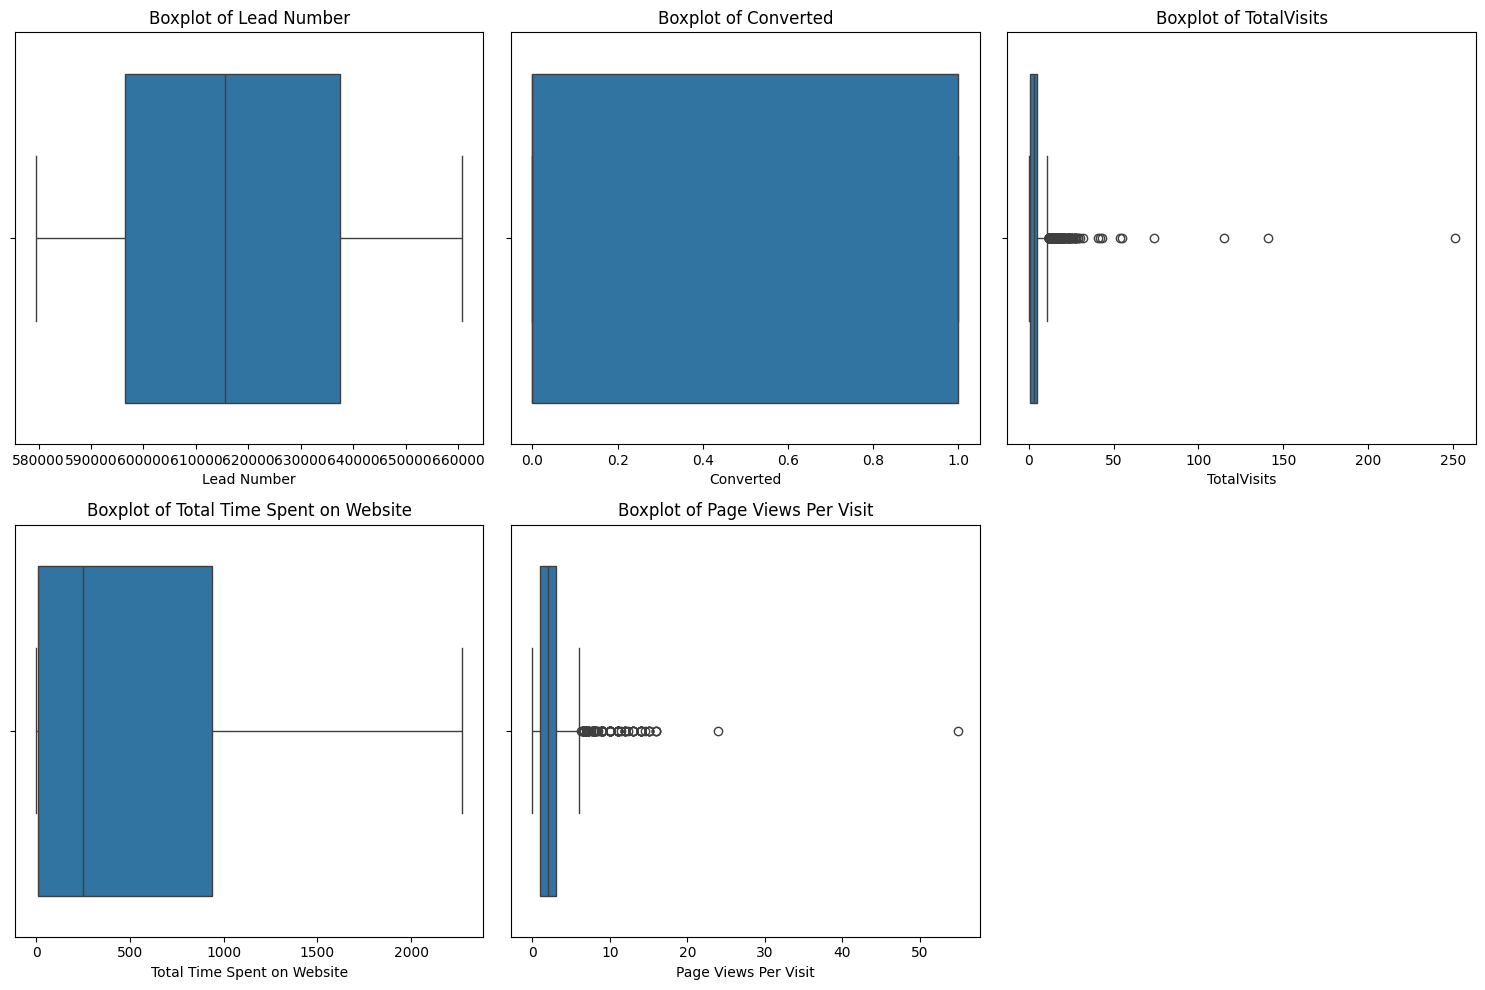

In [847]:
def plot_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    num_cols = len(numeric_cols)
    
    # Calculate the number of rows needed for the subplots
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, col in enumerate(numeric_cols):
        # Check if the column has valid data
        if df[col].notnull().any():  # Ensure there are non-null values
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Plotting boxplot for visualization
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
            axes[i].set_xlabel(col)
        else:
            axes[i].set_title(f'No Data for {col}')
            axes[i].axis('off')  # Turn off the axis if no data

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()  # Adjust layout
    plt.show()

# Call the function to plot outliers
plot_outliers_iqr(Lead_df)

In [848]:
total_visits_95th_percentile = Lead_df['TotalVisits'].quantile(0.95)
Lead_df['TotalVisits'] = Lead_df['TotalVisits'].apply(lambda x: total_visits_95th_percentile if x > total_visits_95th_percentile else x)

# Cap outliers in 'Page Views Per Visit' column
page_views_per_visit_95th_percentile = Lead_df['Page Views Per Visit'].quantile(0.95)
Lead_df['Page Views Per Visit'] = Lead_df['Page Views Per Visit'].apply(lambda x: page_views_per_visit_95th_percentile if x > page_views_per_visit_95th_percentile else x)

### Step 3: Converting into Dummies

In [849]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_df[varlist] = Lead_df[varlist].apply(binary_map)

In [850]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


In [851]:
columns_to_analyze = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization'
]

# Iterate through the columns and print unique values
for column in columns_to_analyze:
    if column in Lead_df.columns:  # Check if the column exists in the DataFrame
        unique_values = Lead_df[column].unique()  # Get unique values
        print(f'Unique values in "{column}": {unique_values}\n')
    else:
        print(f'Column "{column}" does not exist in the DataFrame.\n')

Unique values in "Lead Origin": ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Unique values in "Lead Source": ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Unique values in "Do Not Email": [0 1]

Unique values in "Last Activity": ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']

Unique values in "What is your current occupation": ['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 '

In [852]:
columns_to_dummify = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization'
]

# Create dummy variables
Lead_df_dummies = pd.get_dummies(Lead_df, columns=columns_to_dummify, prefix=columns_to_dummify, drop_first=True)

# Print the updated DataFrame
print(Lead_df_dummies.head())

                            Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False      

### Step 4 :Test Train Split

In [853]:
Lead_df_dummies.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_1', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Las

In [854]:
Lead_df_dummies.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [855]:
X = Lead_df_dummies.drop(['Converted'], axis=1)
y = Lead_df_dummies['Converted']

# Step 2: Split the data, keeping 'Prospect ID' and 'Lead Number' in X
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 3: Separate 'Prospect ID' and 'Lead Number' from features
train_ids = X_train[['Lead Number']]
test_ids = X_test[['Lead Number']]
X_train = X_train.drop(['Prospect ID', 'Lead Number'], axis=1)
X_test = X_test.drop(['Prospect ID', 'Lead Number'], axis=1)

### Step 5: Feature Scaling

In [856]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0.0,0,0.00,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6795,4.0,487,1.33,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3516,5.0,106,2.50,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,Fal

In [857]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,-1.152121,-0.885371,-1.269958,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6795,0.297240,0.005716,-0.519633,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3516,0.659580,-0.691418,0.140427,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,F

### Step 6: Looking at Correlations

In [858]:
X = X.drop(['Prospect ID', 'Lead Number'], axis=1)

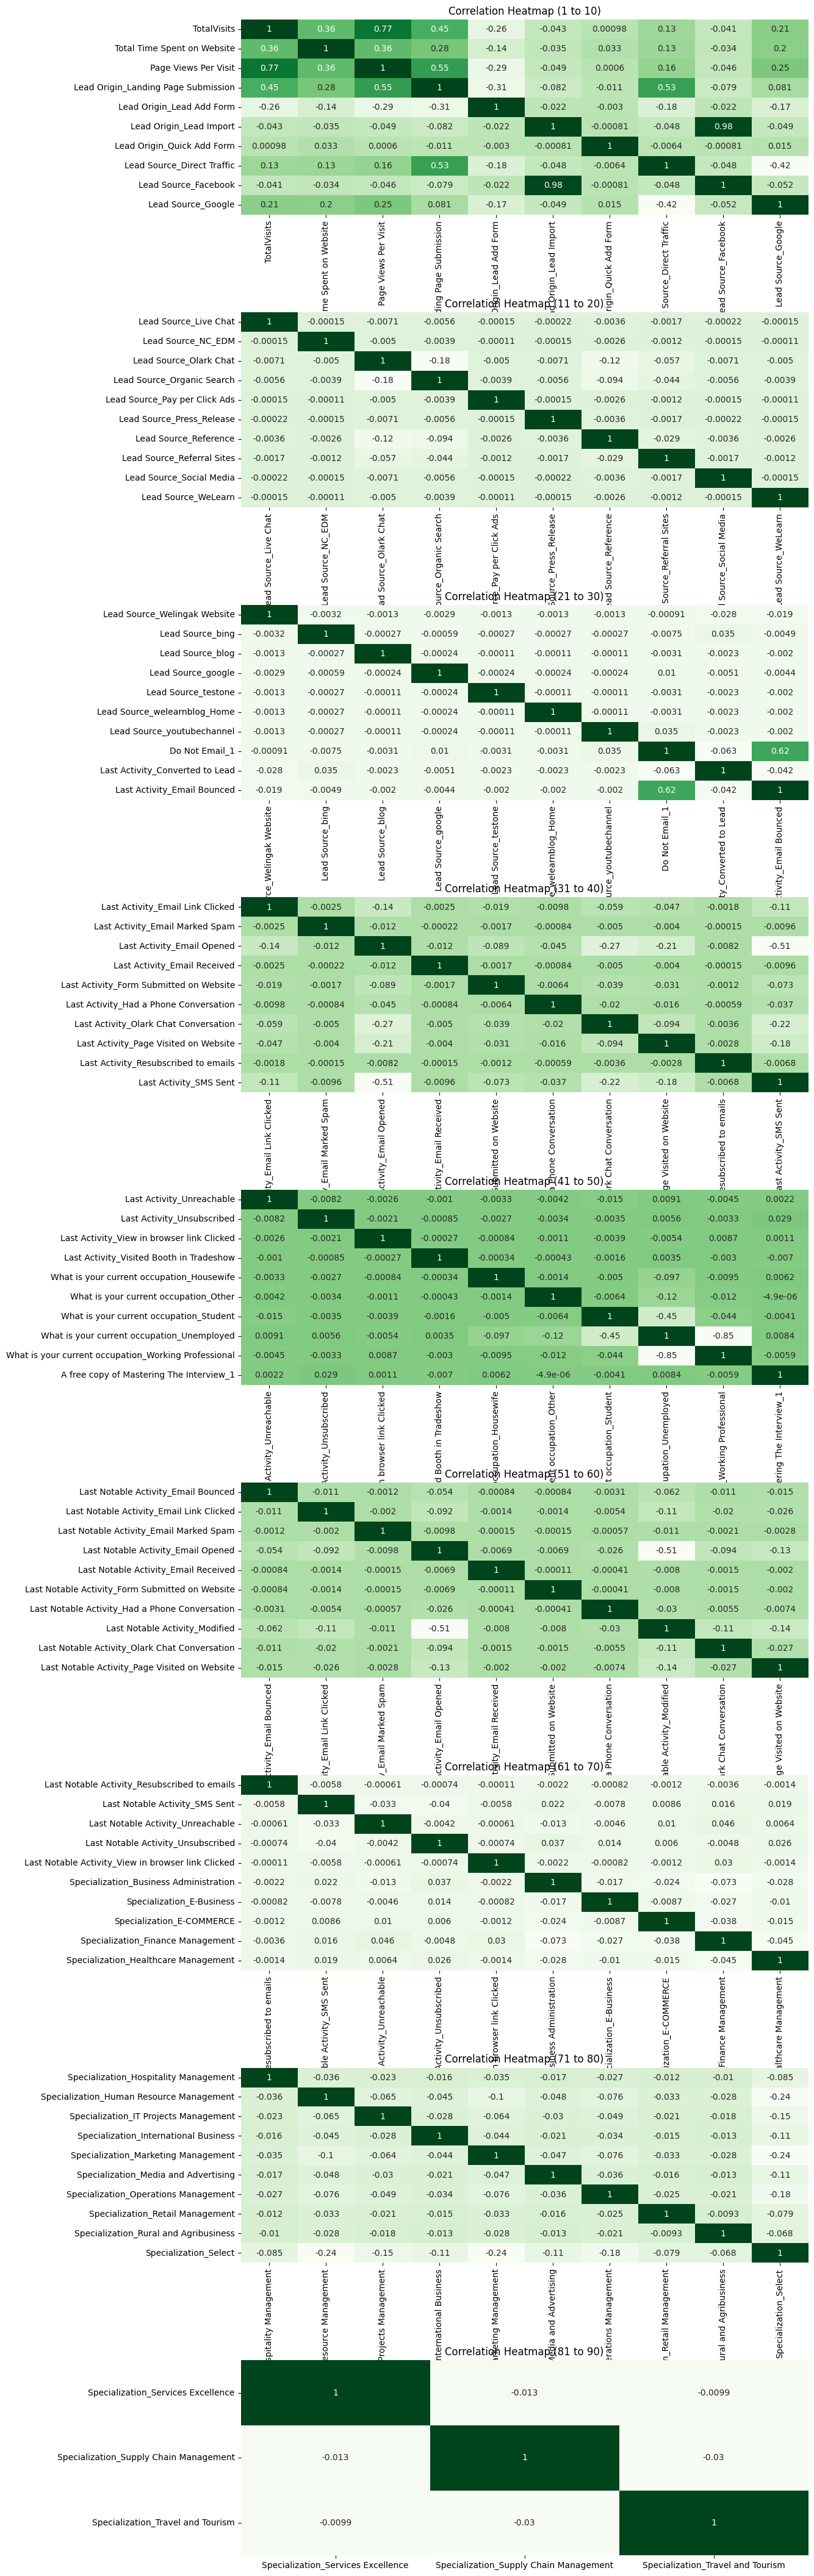

In [859]:
corr_matrix = X.corr()

# Define the number of columns per heatmap
cols_per_heatmap = 10

# Calculate the number of heatmaps needed
num_heatmaps = (len(X.columns) // cols_per_heatmap) + (len(X.columns) % cols_per_heatmap > 0)

# Create the heatmaps
fig, axes = plt.subplots(nrows=num_heatmaps, ncols=1, figsize=(12, 6 * num_heatmaps), constrained_layout=False)
plt.subplots_adjust(hspace=0.5)  # Increase the vertical space between subplots

for i in range(num_heatmaps):
    start_col = i * cols_per_heatmap
    end_col = start_col + cols_per_heatmap
    
    # Select the columns for the current heatmap
    heatmap_cols = X.columns[start_col:end_col]
    
    # Create the heatmap
    sns.heatmap(corr_matrix.loc[heatmap_cols, heatmap_cols], annot=True, cmap='Greens', ax=axes[i], cbar=False)
    axes[i].set_title(f'Correlation Heatmap ({start_col + 1} to {end_col})')
    
plt.show()

In [860]:
def drop_highly_correlated_columns(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a mask for the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find columns with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the highly correlated columns
    df_dropped = df.drop(columns=to_drop)
    
    return df_dropped, to_drop

# Drop highly correlated columns from X_train and X_test
X_train_cleaned, dropped_columns_train = drop_highly_correlated_columns(X_train)
X_test_cleaned, dropped_columns_test = drop_highly_correlated_columns(X_test)

# Print the results
print("Dropped columns from X_train:", dropped_columns_train)
print("Dropped columns from X_test:", dropped_columns_test)

Dropped columns from X_train: ['Lead Source_Facebook', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Resubscribed to emails']
Dropped columns from X_test: ['Lead Source_Facebook', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_View in browser link Clicked']


### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [861]:
X_train = X_train.astype('float64')

In [862]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 16 Sep 2024   Deviance:                   1.6137e+05
Time:                        22:25:24   Pearson chi2:                 7.89e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.889e+15   5.26e+07   3.59e+07      0.000    1.89e+15    1.89e+15
TotalVisits                                           2.293e+14   1.41e+06   1.62e+08      0.000    2.29e+14    2.29e+14
Total Time Spent on Website                           7.452e+14   9.56e+05   7.79e+08      0.000    7.45e+14    7.45e+14
Page Views Per Visit                                 -2.612e+14   1.54e+06   -1.7e+08      0.000   -2.61e+14   -2.61e+14
Lead Origin_Landing Page Submission                  -3.017e+14   3.39e+06   -8.9e+07      0.000   -3.02e+14   -3.02e+14
Lead Origin_Lead Add Form                             1.987e+15    1.3e+07   1.53e+08      0.000    1.99e+15    1.99e+15
Lead Origin_Lead Import                              -1.271e+15    4.8e+07  -2.65e+07      0.000   -1.27e+15   -1.27e+15
Lead Origin_Quick Add Form                            3.365e+15   6.78e+07   4.96e+07      0.000    3.37e+15    3.37e+15
Lead Source_Direct Traffic                            1.418e+15   4.11e+07   3.45e+07      0.000    1.42e+15    1.42e+15
Lead Source_Facebook                                  2.607e+15   6.31e+07   4.13e+07      0.000    2.61e+15    2.61e+15
Lead Source_Google                                    1.366e+15   4.09e+07   3.34e+07      0.000    1.37e+15    1.37e+15
Lead Source_Live Chat                                 6.274e+15   6.14e+07   1.02e+08      0.000    6.27e+15    6.27e+15
Lead Source_NC_EDM                                    5.032e+15   7.87e+07   6.39e+07      0.000    5.03e+15    5.03e+15
Lead Source_Olark Chat                                2.131e+15   4.11e+07   5.19e+07      0.000    2.13e+15    2.13e+15
Lead Source_Organic Search                            1.406e+15   4.11e+07   3.42e+07      0.000    1.41e+15    1.41e+15
Lead Source_Pay per Click Ads                        -1.283e+15   7.87e+07  -1.63e+07      0.000   -1.28e+15   -1.28e+15
Lead Source_Press_Release                             -1.32e+15   6.32e+07  -2.09e+07      0.000   -1.32e+15   -1.32e+15
Lead Source_Reference                                  7.76e+14    3.9e+07   1.99e+07      0.000    7.76e+14    7.76e+14
Lead Source_Referral Sites                            1.386e+15   4.16e+07   3.33e+07      0.000    1.39e+15    1.39e+15
Lead Source_Social Media                              2.115e+15   6.28e+07   3.37e+07      0.000    2.11e+15    2.11e+15
Lead Source_WeLearn                                   5.947e+15   7.87e+07   7.56e+07      0.000    5.95e+15    5.95e+15
Lead Source_Welingak Website                          1.558e+15   3.96e+07   3.94e+07      0.000    1.56e+15    1.56e+15
Lead Source_bing                                       3.3

In [863]:
logreg = LogisticRegression()

In [864]:
rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [865]:
rfe.support_

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False])

In [866]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', False, 2),
 ('Lead Source_testone', False, 4),
 ('Lead Source_welearnblog

In [867]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'A free copy of Mastering The Interview_1',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity

##### Assessing the model with StatsModels

In [868]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.8
Date:                Mon, 16 Sep 2024   Deviance:                       5205.6
Time:                        22:25:26   Pearson chi2:                 7.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4864      1.330      0.366      0.715      -2.120       3.092
Total Time Spent on Website                              1.0782      0.040     26.805      0.000       0.999       1.157
Page Views Per Visit                                    -0.1587      0.053     -2.992      0.003      -0.263      -0.055
Lead Origin_Landing Page Submission                     -0.9711      0.138     -7.055      0.000      -1.241      -0.701
Lead Origin_Lead Add Form                                2.8424      0.219     12.969      0.000       2.413       3.272
Lead Source_Direct Traffic                              -0.3706      0.096     -3.844      0.000      -0.560      -0.182
Lead Source_Facebook                                    -0.5172      0.524     -0.986      0.324      -1.545       0.511
Lead Source_Olark Chat                                   0.6990      0.142      4.915      0.000       0.420       0.978
Lead Source_Organic Search                              -0.0937      0.117     -0.803      0.422      -0.322       0.135
Lead Source_Referral Sites                              -0.1315      0.316     -0.416      0.677      -0.750       0.487
Lead Source_Welingak Website                             2.4488      0.746      3.282      0.001       0.987       3.911
Do Not Email_1                                          -1.1126      0.213     -5.216      0.000      -1.531      -0.695
Last Activity_Converted to Lead                         -1.0940      0.249     -4.394      0.000      -1.582      -0.606
Last Activity_Email Bounced                             -1.2719      0.441     -2.885      0.004      -2.136      -0.408
Last Activity_Email Link Clicked                        -0.5161      0.400     -1.292      0.196      -1.299       0.267
Last Activity_Form Submitted on Website                 -0.7384      0.367     -2.009      0.044      -1.459      -0.018
Last Activity_Had a Phone Conversation                   0.6495      0.972      0.668      0.504      -1.257       2.556
Last Activity_Olark Chat Conversation                   -1.2582      0.221     -5.695      0.000      -1.691      -0.825
Last Activity_Page Visited on Website                   -0.6521      0.250     -2.609      0.009      -1.142      -0.162
Last Activity_Resubscribed to emails                    11.6102   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4017      0.180      2.235      0.025       0.049       0.754
Last Activity_Unreachable                               -1.0614      0.673     -1.578      0.115      -2.380       0.257
What is your current occupation_Housewife               22

In [869]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.480128
6795    0.076681
3516    0.213494
8105    0.834590
3934    0.168110
4844    0.991029
3297    0.182673
8071    0.995995
987     0.118656
7423    0.912961
dtype: float64

In [870]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.48012835, 0.07668109, 0.21349373, 0.83458982, 0.16810972,
       0.99102946, 0.18267263, 0.99599526, 0.11865606, 0.91296107])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [871]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final = pd.concat([train_ids.reset_index(drop=True), y_train_pred_final], axis=1)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,641410,0,0.480128
1,597687,0,0.076681
2,626825,0,0.213494
3,587928,0,0.834590
4,622366,0,0.168110


In [872]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,641410,0,0.480128,0
1,597687,0,0.076681,0
2,626825,0,0.213494,0
3,587928,0,0.834590,1
4,622366,0,0.168110,0


In [873]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3564  438]
 [ 693 1773]]


In [874]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.825139146567718


#### Checking VIFs

In [875]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [876]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,Last Notable Activity_Resubscribed to emails,inf
18,Last Activity_Resubscribed to emails,inf
24,What is your current occupation_Unemployed,170.00
30,Last Notable Activity_Modified,70.32
28,Last Notable Activity_Email Opened,55.87
34,Last Notable Activity_SMS Sent,50.57
25,What is your current occupation_Working Profes...,15.34
32,Last Notable Activity_Page Visited on Website,8.84
19,Last Activity_SMS Sent,8.72
2,Lead Origin_Landing Page Submission,8.39


In [877]:
col = col.drop(['What is your current occupation_Unemployed','Last Notable Activity_Resubscribed to emails','Last Activity_Resubscribed to emails'
               ,'Last Notable Activity_Modified'], 1)
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_1', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable

In [878]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.1
Date:                Mon, 16 Sep 2024   Deviance:                       5212.2
Time:                        22:25:31   Pearson chi2:                 7.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2809      0.173     -1.620      0.105      -0.621       0.059
Total Time Spent on Website                              1.0782      0.040     26.815      0.000       0.999       1.157
Page Views Per Visit                                    -0.1602      0.053     -3.021      0.003      -0.264      -0.056
Lead Origin_Landing Page Submission                     -0.9692      0.137     -7.051      0.000      -1.239      -0.700
Lead Origin_Lead Add Form                                2.8357      0.219     12.930      0.000       2.406       3.266
Lead Source_Direct Traffic                              -0.3718      0.096     -3.858      0.000      -0.561      -0.183
Lead Source_Facebook                                    -0.5375      0.525     -1.024      0.306      -1.567       0.492
Lead Source_Olark Chat                                   0.7019      0.142      4.939      0.000       0.423       0.980
Lead Source_Organic Search                              -0.0940      0.117     -0.806      0.420      -0.323       0.135
Lead Source_Referral Sites                              -0.1204      0.316     -0.382      0.703      -0.739       0.498
Lead Source_Welingak Website                             2.4363      0.746      3.266      0.001       0.974       3.898
Do Not Email_1                                          -0.9806      0.196     -4.995      0.000      -1.365      -0.596
Last Activity_Converted to Lead                         -1.1519      0.247     -4.661      0.000      -1.636      -0.667
Last Activity_Email Bounced                             -1.4400      0.429     -3.357      0.001      -2.281      -0.599
Last Activity_Email Link Clicked                        -0.5741      0.398     -1.441      0.150      -1.355       0.207
Last Activity_Form Submitted on Website                 -0.7893      0.367     -2.149      0.032      -1.509      -0.070
Last Activity_Had a Phone Conversation                   0.5831      0.968      0.602      0.547      -1.314       2.480
Last Activity_Olark Chat Conversation                   -1.3200      0.219     -6.038      0.000      -1.749      -0.892
Last Activity_Page Visited on Website                   -0.7179      0.247     -2.901      0.004      -1.203      -0.233
Last Activity_SMS Sent                                   0.3372      0.177      1.910      0.056      -0.009       0.683
Last Activity_Unreachable                               -1.1273      0.671     -1.680      0.093      -2.443       0.188
What is your current occupation_Housewife               22.8335   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
What is your current occupation_Other                    0

In [879]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final = pd.concat([train_ids.reset_index(drop=True), y_train_pred_final], axis=1)
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3565  437]
 [ 696 1770]]
0.8248299319727891


##### Let's check the VIFs again

In [880]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Activity_SMS Sent,6.73
2,Lead Origin_Landing Page Submission,5.46
30,Last Notable Activity_SMS Sent,4.83
36,Specialization_Select,3.24
13,Last Activity_Email Link Clicked,3.04
25,Last Notable Activity_Email Link Clicked,2.87
26,Last Notable Activity_Email Opened,2.87
6,Lead Source_Olark Chat,2.86
17,Last Activity_Page Visited on Website,2.52
1,Page Views Per Visit,2.35


In [881]:
col = col.drop(['Last Activity_SMS Sent'], 1)
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_1', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
  

In [882]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.9
Date:                Mon, 16 Sep 2024   Deviance:                       5215.8
Time:                        22:25:35   Pearson chi2:                 7.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1314      0.154     -0.854      0.393      -0.433       0.170
Total Time Spent on Website                              1.0775      0.040     26.806      0.000       0.999       1.156
Page Views Per Visit                                    -0.1601      0.053     -3.018      0.003      -0.264      -0.056
Lead Origin_Landing Page Submission                     -0.9638      0.137     -7.017      0.000      -1.233      -0.695
Lead Origin_Lead Add Form                                2.8326      0.220     12.894      0.000       2.402       3.263
Lead Source_Direct Traffic                              -0.3734      0.096     -3.875      0.000      -0.562      -0.185
Lead Source_Facebook                                    -0.5647      0.527     -1.072      0.284      -1.597       0.468
Lead Source_Olark Chat                                   0.6925      0.142      4.881      0.000       0.414       0.971
Lead Source_Organic Search                              -0.0909      0.117     -0.779      0.436      -0.319       0.138
Lead Source_Referral Sites                              -0.1368      0.315     -0.435      0.664      -0.754       0.480
Lead Source_Welingak Website                             2.4627      0.746      3.300      0.001       1.000       3.925
Do Not Email_1                                          -0.9765      0.196     -4.974      0.000      -1.361      -0.592
Last Activity_Converted to Lead                         -1.3031      0.233     -5.583      0.000      -1.761      -0.846
Last Activity_Email Bounced                             -1.5925      0.421     -3.784      0.000      -2.417      -0.768
Last Activity_Email Link Clicked                        -0.7223      0.390     -1.850      0.064      -1.487       0.043
Last Activity_Form Submitted on Website                 -0.9399      0.358     -2.625      0.009      -1.642      -0.238
Last Activity_Had a Phone Conversation                   0.4339      0.963      0.450      0.652      -1.454       2.322
Last Activity_Olark Chat Conversation                   -1.4639      0.204     -7.167      0.000      -1.864      -1.064
Last Activity_Page Visited on Website                   -0.8698      0.234     -3.724      0.000      -1.328      -0.412
Last Activity_Unreachable                               -1.2819      0.666     -1.925      0.054      -2.587       0.023
What is your current occupation_Housewife               22.8013   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
What is your current occupation_Other                    0.2188      0.833      0.263      0.793      -1.413       1.851
What is your current occupation_Student                  0

In [883]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final = pd.concat([train_ids.reset_index(drop=True), y_train_pred_final], axis=1)
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3564  438]
 [ 692 1774]]
0.8252937538651824


In [884]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.56
13,Last Activity_Email Link Clicked,3.00
24,Last Notable Activity_Email Link Clicked,2.87
35,Specialization_Select,2.86
6,Lead Source_Olark Chat,2.82
17,Last Activity_Page Visited on Website,2.38
25,Last Notable Activity_Email Opened,2.36
1,Page Views Per Visit,2.35
4,Lead Source_Direct Traffic,2.23
29,Last Notable Activity_SMS Sent,2.15


## Step 8 :Metrics beyond simply accuracy

In [885]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Calculate false postive rate - predicting churn when customer does not have churned
# 1 -specificty
print(FP/ float(TN+FP))

# positive predictive value 
# Precision
print (TP / float(TP+FP))

# Negative predictive value
# recall
print (TN / float(TN+ FN))

0.10944527736131934
0.8019891500904159
0.8374060150375939


### Step 9: Plotting the ROC Curve

In [886]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [887]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

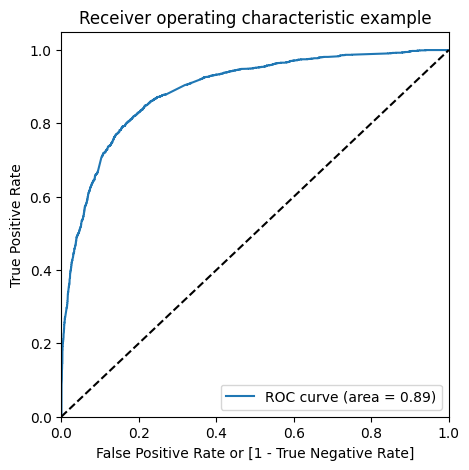

In [888]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [889]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,641410,0,0.478366,0,1,1,1,1,1,0,0,0,0,0
1,597687,0,0.077111,0,1,0,0,0,0,0,0,0,0,0
2,626825,0,0.212590,0,1,1,1,0,0,0,0,0,0,0
3,587928,0,0.833614,1,1,1,1,1,1,1,1,1,1,0
4,622366,0,0.198536,0,1,1,0,0,0,0,0,0,0,0


In [890]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.616574  0.971614  0.397801
0.2   0.2  0.759122  0.909570  0.666417
0.3   0.3  0.807978  0.848743  0.782859
0.4   0.4  0.822820  0.787105  0.844828
0.5   0.5  0.825294  0.719384  0.890555
0.6   0.6  0.807514  0.609895  0.929285
0.7   0.7  0.788497  0.530008  0.947776
0.8   0.8  0.766079  0.435929  0.969515
0.9   0.9  0.722480  0.293187  0.987006


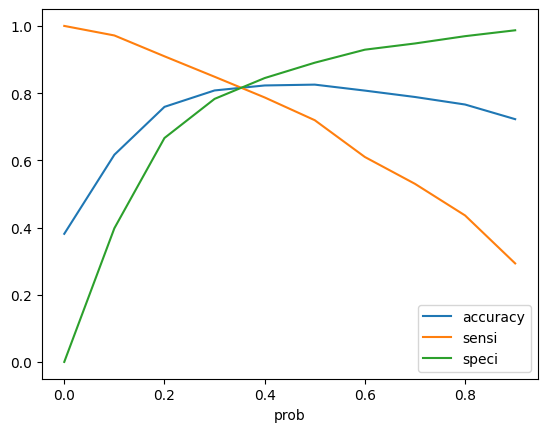

In [891]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [892]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,641410,0,0.478366,0,1,1,1,1,1,0,0,0,0,0,1
1,597687,0,0.077111,0,1,0,0,0,0,0,0,0,0,0,0
2,626825,0,0.212590,0,1,1,1,0,0,0,0,0,0,0,0
3,587928,0,0.833614,1,1,1,1,1,1,1,1,1,1,0,1
4,622366,0,0.198536,0,1,1,0,0,0,0,0,0,0,0,0


In [893]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,8.0,1011,6.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2376,0.0,0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7766,5.0,59,5.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fals

### Step 11: Making predictions on the test set

In [894]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_1,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,1.746601,0.964504,2.114966,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2376,-1.152121,-0.885371,-1.269958,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7766,0.659580,-0.777416,1.550812,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,F

In [895]:
X_test.shape

(2772, 83)

In [896]:
X_test = X_test.astype('float64')

In [897]:
y_test_pred.head()

4269    0.943972
2376    0.745630
7766    0.947461
9199    0.061074
4359    0.222035
dtype: float64

In [898]:
X_test_sm = sm.add_constant(X_test[col])

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

4269    0.616288
2376    0.902776
7766    0.955960
9199    0.054197
4359    0.886294
9186    0.575119
1631    0.450819
8963    0.169071
8007    0.060557
5324    0.421308
dtype: float64

In [899]:
y_pred_df = pd.DataFrame(y_test_pred, columns=['Converted_Prob'], index=X_test.index)

# Step 3: Add actual conversion status
y_pred_df['Converted'] = y_test

In [900]:
y_pred_df.head()

,Converted_Prob,Converted
4269,0.616288,1
2376,0.902776,1
7766,0.955960,1
9199,0.054197,0
4359,0.886294,1


In [901]:
# Step 4: Add Lead Number
y_pred_df =  y_pred_df.join(test_ids)

In [902]:
# Step 5: Create Lead Score
y_pred_df['Lead_Score'] = (y_pred_df['Converted_Prob'] * 100).round().astype(int)

In [903]:
# Let's see the head of y_pred_final
y_pred_df.head()

y_pred_df['final_predicted'] = y_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_df.head()

,Converted_Prob,Converted,Lead Number,Lead_Score,final_predicted
4269,0.616288,1,619003,62,1
2376,0.902776,1,636884,90,1
7766,0.955960,1,590281,96,1
9199,0.054197,0,579892,5,0
4359,0.886294,1,617929,89,1


In [904]:

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_df.Converted, y_pred_df.final_predicted)

confusion2 = metrics.confusion_matrix(y_pred_df.Converted, y_pred_df.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

0.8276684555754323

In [905]:
y_pred_df.head()

,Converted_Prob,Converted,Lead Number,Lead_Score,final_predicted
4269,0.616288,1,619003,62,1
2376,0.902776,1,636884,90,1
7766,0.955960,1,590281,96,1
9199,0.054197,0,579892,5,0
4359,0.886294,1,617929,89,1


In [906]:
def categorize_lead(score):
    if score >= 80:
        return 'Hot'
    elif 50 <= score < 80:
        return 'Warm'
    else:
        return 'Cold'

y_pred_df['Lead_Category'] = y_pred_df['Lead_Score'].apply(categorize_lead)

# Step 9: Reorder columns
final_leads_df = y_pred_df[[ 'Lead Number', 'Lead_Score', 'Lead_Category', 'Converted_Prob', 'Converted']]

# Step 10: Sort by Lead Score
final_leads_df = final_leads_df.sort_values('Lead_Score', ascending=False)

# Display the first few rows of the final dataframe
print("\nFirst few rows of the final dataframe:")
print(final_leads_df.head(10))

# Check for NaN values
print("\nNaN value counts in final_leads_df:")
print(final_leads_df.isna().sum())

# Save the dataframe to a CSV file
final_leads_df.to_csv('lead_scores.csv', index=False)

# Print summary statistics
print(f"\nTotal Hot Leads: {sum(final_leads_df['Lead_Category'] == 'Hot')}")
print(f"Total Warm Leads: {sum(final_leads_df['Lead_Category'] == 'Warm')}")
print(f"Total Cold Leads: {sum(final_leads_df['Lead_Category'] == 'Cold')}")

# Calculate conversion rate for each category
for category in ['Hot', 'Warm', 'Cold']:
    category_df = final_leads_df[final_leads_df['Lead_Category'] == category]
    conversion_rate = (category_df['Converted'].sum() / len(category_df)) * 100
    print(f"\nConversion Rate for {category} Leads: {conversion_rate:.2f}%")


First few rows of the final dataframe:
      Lead Number  Lead_Score Lead_Category  Converted_Prob  Converted
8120       587853         100           Hot        0.998596          1
5807       605262         100           Hot        0.997721          1
4771       614107         100           Hot        0.997721          1
4775       614096         100           Hot        0.997721          1
3478       627106         100           Hot        0.999552          1
4955       612484         100           Hot        0.997208          1
5586       607109         100           Hot        0.997721          1
4613       615524         100           Hot        0.998570          1
6383       600952         100           Hot        0.998424          1
3321       628308         100           Hot        0.997721          1

NaN value counts in final_leads_df:
Lead Number       0
Lead_Score        0
Lead_Category     0
Converted_Prob    0
Converted         0
dtype: int64

Total Hot Leads: 485
Total W

### Top three variables

In [907]:

# Extract coefficients and their corresponding feature names
coefficients = res.params

# Create a DataFrame for better visualization
coef_df = pd.DataFrame(coefficients)
coef_df.columns = ['Coefficient']

# Calculate odds ratio for better interpretation
coef_df['Odds Ratio'] = coef_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))

# Sort by absolute value of coefficients to find top contributors
top_contributors = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Get top three variables contributing most to conversion probability
top_three_variables = top_contributors.head(10)

print("Top Three Variables Contributing to Conversion Probability:")
print(top_three_variables)

Top Three Variables Contributing to Conversion Probability:
                                                    Coefficient    Odds Ratio
What is your current occupation_Housewife             22.801297  7.988724e+09
Last Notable Activity_Unreachable                      2.929405  1.871650e+01
Last Notable Activity_Had a Phone Conversation         2.860336  1.746740e+01
Lead Origin_Lead Add Form                              2.832566  1.698900e+01
What is your current occupation_Working Profess...     2.647382  1.411700e+01
Lead Source_Welingak Website                           2.462656  1.173590e+01
Last Notable Activity_Email Bounced                    1.822581  6.187800e+00
Last Activity_Email Bounced                           -1.592540  2.034000e-01
Last Notable Activity_SMS Sent                         1.483903  4.410100e+00
Last Activity_Olark Chat Conversation                 -1.463935  2.313000e-01
